<h3>Загрузка датасету</h3>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('possum.csv')
dataset

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


<h3>Видалення NaN</h3>

In [2]:
# Видалення рядків з NaN значеннями
dataset.dropna(inplace=True)

<h3>Розбиття ознак (багато Х)</h3>

In [3]:
# Одержання ознак (X) та цільової змінної (y)
X = dataset.drop(['totlngth'], axis=1).select_dtypes(include=['float64'])
y = dataset['totlngth']

<h3>Розбиття на вибірки</h3>

In [4]:
from sklearn.model_selection import train_test_split

# Розбиття на тестову та тренувальну вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h3>Побудова лінійної регресійної моделі</h3>

In [5]:
from sklearn.linear_model import LinearRegression

# Створення та навчання моделі з однією функцією (години вивчення)
regression = LinearRegression()
regression.fit(X_train, y_train)
print(regression.score(X_test, y_test))

0.6919580738844984


<h3>Прогноз</h3>

In [6]:
y_pred = regression.predict(X_test) 
y_pred

array([84.10022564, 88.95675514, 92.2787109 , 96.3416902 , 81.33387871,
       84.31649164, 88.82677239, 84.42248524, 89.38515176, 83.8447732 ,
       92.16316739, 85.5061786 , 81.14284507, 88.9999186 , 89.33320562,
       86.62629028, 87.3981292 , 88.34280827, 86.9077075 , 88.69894888,
       85.48127701, 83.81960404, 90.97943022, 87.77727151, 88.73229088,
       92.18451124])

<h3>Оцінка</h3>

In [7]:
from sklearn.metrics import r2_score

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 5.574374086051672
R-squared: 0.6919580738844984


<h3>Знаходження оптимальних параметрів з допомогою Ridge</h3>

In [8]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge Regression
ridge = RidgeCV(alphas=[0.1, 0.2, 0.5, 0.8, 1.0, 3.0, 5.0, 7.0, 10.0])
ridge.fit(X_train, y_train)
ridge_alpha = ridge.alpha_

print("Optimal alpha for Ridge:", ridge_alpha)

# Оцінка моделі
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Mean Squared Error (Ridge):', mse_ridge)
print('R-squared (Ridge):', r2_ridge)

Optimal alpha for Ridge: 10.0
Mean Squared Error (Ridge): 5.649680795891407
R-squared (Ridge): 0.687796597889104


<h3>Знаходження оптимальних параметрів з допомогою Lasso</h3>

In [9]:
# Lasso Regression
lasso = LassoCV(alphas=[0.1, 0.2, 0.5, 0.8, 1.0, 3.0, 5.0, 7.0, 10.0])
lasso.fit(X_train, y_train)
lasso_alpha = lasso.alpha_
print("Optimal alpha for Lasso:", lasso_alpha)

# Оцінка моделі
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Mean Squared Error (Lasso):', mse_lasso)
print('R-squared (Lasso):', r2_lasso)

Optimal alpha for Lasso: 0.5
Mean Squared Error (Lasso): 5.915788377324484
R-squared (Lasso): 0.6730913967897203


<h3>Новий датасет (для перевірки алгоритму регресії)</h3>

In [10]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data)

x = df[['interest_rate','unemployment_rate']]
y = df['index_price']

from sklearn.model_selection import train_test_split

# Розбиття на тестову та тренувальну вибірки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print(regr.score(X_test, y_test))

0.8313408388278937


In [11]:
y_pred = regr.predict(X_test) 

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)
print("Коефіцієнт 'a':", regr.coef_[0])
print("Коефіцієнт 'b':", regr.coef_[1])
print("Коефіцієнт 'с':", regr.intercept_)

Mean Squared Error: 7913.525322008823
R-squared: 0.8313408388278937
Коефіцієнт 'a': 394.5217258728473
Коефіцієнт 'b': -155.36057325811805
Коефіцієнт 'с': 1149.700106723581


In [18]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge Regression
ridge = RidgeCV(alphas=[0.1, 0.2, 0.5, 0.8, 1.0, 3.0, 5.0, 7.0, 10.0])
ridge.fit(X_train, y_train)
ridge_alpha = ridge.alpha_
print("Optimal alpha for Ridge:", ridge_alpha)

# Оцінка моделі
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Mean Squared Error (Ridge):', mse_ridge)
print('R-squared (Ridge):', r2_ridge)
print("Коефіцієнт 'a':", ridge.coef_[0])
print("Коефіцієнт 'b':", ridge.coef_[1])
print("Коефіцієнт 'с':", ridge.intercept_)

Optimal alpha for Ridge: 0.1
Mean Squared Error (Ridge): 7991.088645672259
R-squared (Ridge): 0.8296877493924668
Коефіцієнт 'a': 335.3196287086599
Коефіцієнт 'b': -204.58353282777077
Коефіцієнт 'с': 1558.5347120329739


In [19]:
# Lasso Regression
lasso = LassoCV(alphas=[0.1, 0.2, 0.5, 0.8, 1.0, 3.0, 5.0, 7.0, 10.0])
lasso.fit(X_train, y_train)
lasso_alpha = lasso.alpha_

print("Optimal alpha for Lasso:", lasso_alpha)

# Оцінка моделі
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Mean Squared Error (Lasso):', mse_lasso)
print('R-squared (Lasso):', r2_lasso)
print("Коефіцієнт 'a':", lasso.coef_[0])
print("Коефіцієнт 'b':", lasso.coef_[1])
print("Коефіцієнт 'с':", lasso.intercept_)

Optimal alpha for Lasso: 0.1
Mean Squared Error (Lasso): 7950.110938819203
R-squared (Lasso): 0.8305610979170961
Коефіцієнт 'a': 394.85276240629696
Коефіцієнт 'b': -154.15601814581166
Коефіцієнт 'с': 1142.0549840053313


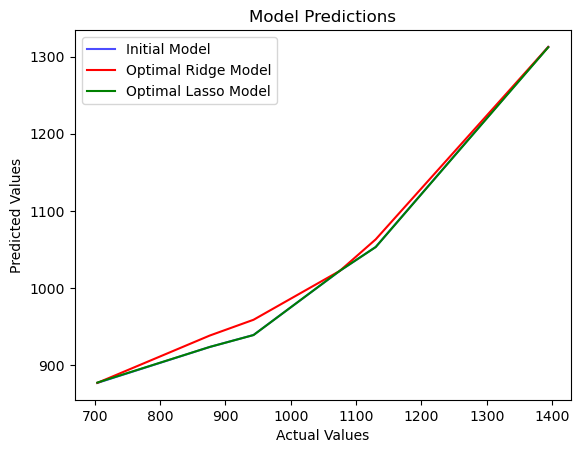

In [15]:
# Sort the predicted values based on actual values for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
y_pred_ridge_sorted = y_pred_ridge[sorted_indices]
y_pred_lasso_sorted = y_pred_lasso[sorted_indices]

# Plot all model predictions on one plot
plt.plot(y_test_sorted, y_pred_sorted, label='Initial Model', color='blue', alpha=0.7)
plt.plot(y_test_sorted, y_pred_ridge_sorted, label='Optimal Ridge Model', color='red')
plt.plot(y_test_sorted, y_pred_lasso_sorted, label='Optimal Lasso Model', color='green')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions")
plt.legend()
plt.show()
